In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/raw_data/statcast_batter_stats_2023_2025.csv')
df.head()

,"last_name, first_name",player_id,year,player_age,pa,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,woba,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,exit_velocity_avg,barrel_batted_rate,hard_hit_percent,avg_best_speed,iz_contact_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,sprint_speed
0,"Heineman, Tyler",623168,2025,34,51,19.6,3.9,0.396,0.542,0.412,0.954,0.412,65.5,7.0,7.9,-12.8,27.8,85.0,5.1,28.2,96.700958,86.9,58.6,46.2,30.8,23.1,26.1
1,"Hoerner, Nico",663538,2024,27,641,10.3,6.9,0.273,0.373,0.335,0.708,0.313,68.2,7.1,4.9,-1.4,32.7,85.7,1.2,27.6,95.980927,92.7,48.4,33.3,37.4,29.3,28.4
2,"Alvarez, Yordan",670541,2024,27,635,15.0,10.9,0.308,0.567,0.392,0.959,0.402,76.5,7.6,8.8,-6.0,35.1,93.1,14.5,49.7,104.097105,88.5,47.8,36.4,38.4,25.2,26.1
3,"Altuve, Jose",514888,2024,34,682,17.4,6.9,0.295,0.439,0.350,0.789,0.344,69.4,7.8,16.5,-4.1,30.2,86.5,6.5,31.2,97.323673,86.5,51.5,51.3,34.6,14.1,27.1
4,"Thomas, Alek",677950,2024,24,103,16.5,6.8,0.189,0.358,0.245,0.603,0.262,70.9,7.1,10.8,-0.3,29.2,91.2,7.6,46.8,101.335203,83.1,49.2,44.3,35.4,20.3,27.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  1738 non-null   object 
 1   player_id              1738 non-null   int64  
 2   year                   1738 non-null   int64  
 3   player_age             1738 non-null   int64  
 4   pa                     1738 non-null   int64  
 5   k_percent              1738 non-null   float64
 6   bb_percent             1738 non-null   float64
 7   batting_avg            1738 non-null   float64
 8   slg_percent            1738 non-null   float64
 9   on_base_percent        1738 non-null   float64
 10  on_base_plus_slg       1738 non-null   float64
 11  woba                   1738 non-null   float64
 12  avg_swing_speed        1671 non-null   float64
 13  avg_swing_length       1671 non-null   float64
 14  attack_angle           1671 non-null   float64
 15  atta

In [ ]:
# There are a few null items for the categories 'avg_swing_lenght', 'average_swing_speed', 
# 'attack_angle', 'attack_direction', 'vertical_swing_path', 'sprint_speed'

In [4]:
# Drop all null values
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 0 to 1737
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  1630 non-null   object 
 1   player_id              1630 non-null   int64  
 2   year                   1630 non-null   int64  
 3   player_age             1630 non-null   int64  
 4   pa                     1630 non-null   int64  
 5   k_percent              1630 non-null   float64
 6   bb_percent             1630 non-null   float64
 7   batting_avg            1630 non-null   float64
 8   slg_percent            1630 non-null   float64
 9   on_base_percent        1630 non-null   float64
 10  on_base_plus_slg       1630 non-null   float64
 11  woba                   1630 non-null   float64
 12  avg_swing_speed        1630 non-null   float64
 13  avg_swing_length       1630 non-null   float64
 14  attack_angle           1630 non-null   float64
 15  attack_di

In [ ]:
# Feature Selection
features = ['player_age', 'avg_swing_speed', 'avg_swing_length',
            'attack_angle', 'attack_direction', 'vertical_swing_path', 'sprint_speed', 'woba']
df2 = df.loc[:, features]
df2.head()

,player_age,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,woba
0,34,65.5,7.0,7.9,-12.8,27.8,26.1,0.412
1,27,68.2,7.1,4.9,-1.4,32.7,28.4,0.313
2,27,76.5,7.6,8.8,-6.0,35.1,26.1,0.402
3,34,69.4,7.8,16.5,-4.1,30.2,27.1,0.344
4,24,70.9,7.1,10.8,-0.3,29.2,27.8,0.262


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 0 to 1737
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_age           1630 non-null   int64  
 1   avg_swing_speed      1630 non-null   float64
 2   avg_swing_length     1630 non-null   float64
 3   attack_angle         1630 non-null   float64
 4   attack_direction     1630 non-null   float64
 5   vertical_swing_path  1630 non-null   float64
 6   sprint_speed         1630 non-null   float64
 7   woba                 1630 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 114.6 KB


In [11]:
df2.describe()

,player_age,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,woba
count,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,27.811043,71.154663,7.286380,10.063313,-1.684785,32.406564,27.248160,0.296751
std,3.702056,2.754466,0.401759,3.862151,4.700761,3.953098,1.392127,0.058707
min,19.000000,62.400000,5.900000,-4.000000,-28.600000,17.200000,22.000000,0.046000
25%,25.000000,69.300000,7.000000,7.600000,-4.800000,29.700000,26.400000,0.267000
50%,27.000000,71.200000,7.300000,10.000000,-1.600000,32.400000,27.300000,0.301000
75%,30.000000,73.000000,7.500000,12.600000,1.100000,34.975000,28.300000,0.333000
max,41.000000,81.200000,8.600000,26.700000,19.200000,45.900000,30.500000,0.569000


In [19]:
# Preprocessing Pipeline

# Define preprocessing for numeric features 
numeric_features = ['player_age', 'avg_swing_speed', 'avg_swing_length',
            'attack_angle', 'attack_direction', 'vertical_swing_path', 'sprint_speed'] 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Correlation Analysis

In [21]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df2)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features)

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final['woba'] = df2.woba
df_final.head()

,player_age,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,woba
0,1.672275,-2.053537,-0.713035,-0.560304,-2.365282,-1.165662,-0.825005,0.412
1,-0.219146,-1.073010,-0.464053,-1.337311,0.060601,0.074252,0.827650,0.313
2,-0.219146,1.941203,0.780855,-0.327201,-0.918264,0.681557,-0.825005,0.402
3,1.672275,-0.637220,1.278819,1.667118,-0.513950,-0.558357,-0.106459,0.344
4,-1.029755,-0.092483,-0.464053,0.190804,0.294678,-0.811401,0.396523,0.262


In [22]:
corrs = df_final.corr()
corrs

,player_age,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,woba
player_age,1.000000,-0.121753,0.048663,0.091966,-0.075362,-0.021933,-0.357631,-0.001521
avg_swing_speed,-0.121753,1.000000,0.585966,0.103483,-0.195627,-0.072884,0.064160,-0.030531
avg_swing_length,0.048663,0.585966,1.000000,0.329170,-0.357668,-0.044440,-0.095731,-0.040413
attack_angle,0.091966,0.103483,0.329170,1.000000,-0.321136,0.379158,-0.120181,-0.000152
attack_direction,-0.075362,-0.195627,-0.357668,-0.321136,1.000000,0.085731,0.084027,0.027483
vertical_swing_path,-0.021933,-0.072884,-0.044440,0.379158,0.085731,1.000000,0.038615,0.011221
sprint_speed,-0.357631,0.064160,-0.095731,-0.120181,0.084027,0.038615,1.000000,0.008633
woba,-0.001521,-0.030531,-0.040413,-0.000152,0.027483,0.011221,0.008633,1.000000


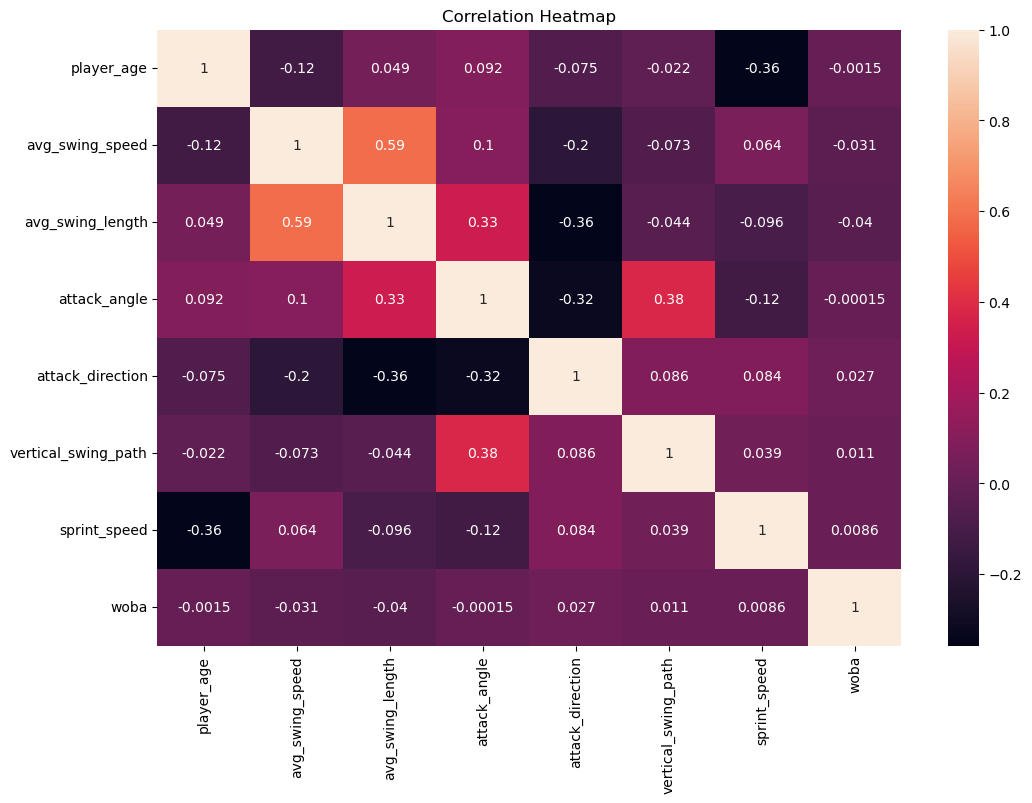

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [25]:
abs(corrs.woba).sort_values(ascending=False)

woba                   1.000000
avg_swing_length       0.040413
avg_swing_speed        0.030531
attack_direction       0.027483
vertical_swing_path    0.011221
sprint_speed           0.008633
player_age             0.001521
attack_angle           0.000152
Name: woba, dtype: float64

# Models

In [26]:
# Step 1: Get the Data
X = df2.drop(columns=["woba"])
y = df2.woba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1630, 7)
(1222, 7)
(408, 7)


In [27]:
X_train.head()

,player_age,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed
401,25,71.6,7.6,12.9,0.4,40.6,27.5
117,29,69.5,6.9,14.8,-3.9,36.3,26.8
1468,30,73.3,7.1,13.6,6.0,38.5,27.7
981,32,68.4,6.8,2.8,8.1,34.4,27.3
1542,34,67.5,6.5,12.1,-4.0,35.1,27.7


In [28]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

TRAIN METRICS
    R2: 0.06629725240378437
    MSE: 0.003267126465067156
    RMSE: 0.057158782921499965
    MAE: 0.04223525110244122
    
TEST METRICS
    R2: 0.0623060116918307
    MSE: 0.003076205976488763
    RMSE: 0.05546355538990232
    MAE: 0.04075866597206674
    


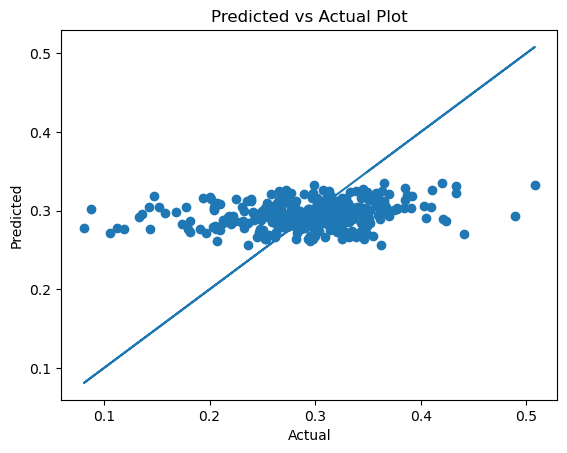

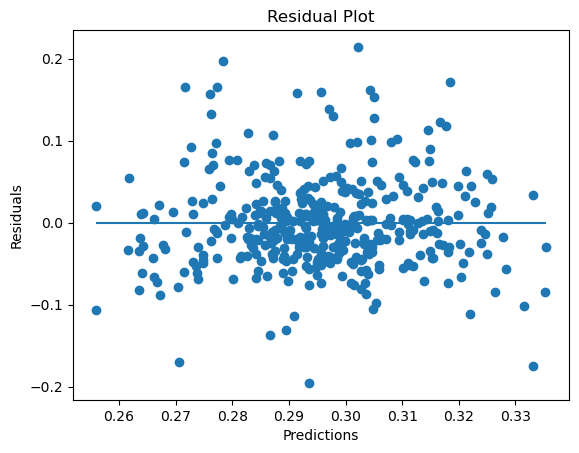

In [ ]:
# Attempt 1 Linear Regression
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

### Lin Regresion Flattened Everthing Out and Did a Poor Job fitting the dataa

TRAIN METRICS
    R2: 0.0
    MSE: 0.003499107690834429
    RMSE: 0.05915325596139598
    MAE: 0.04402349854414834
    
TEST METRICS
    R2: -5.3769388959068465e-06
    MSE: 0.0032806251884056462
    RMSE: 0.05727674212458008
    MAE: 0.041869632713969374
    


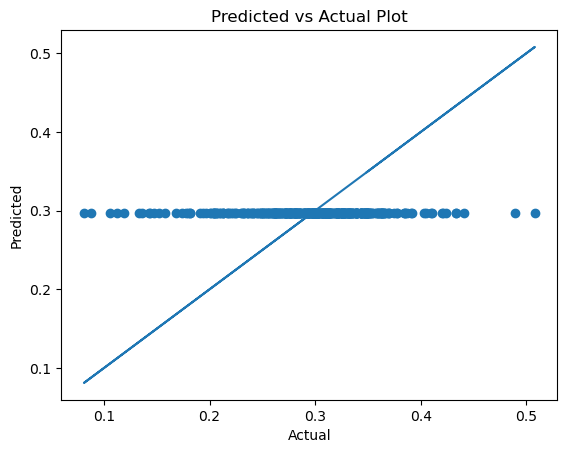

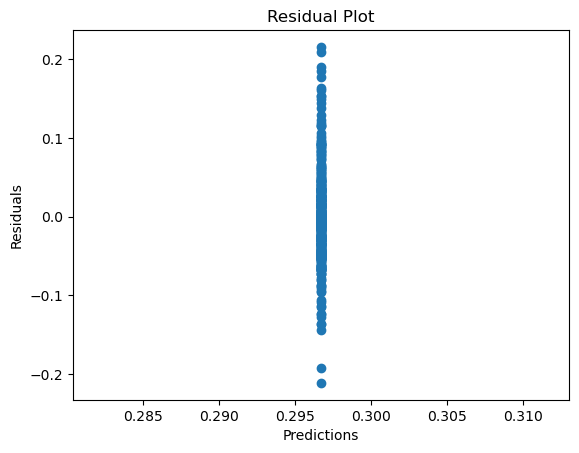

In [30]:
# Attempt 2 Elastic Net
en = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

# Do Machine Learning
doRegression(en, X_train, X_test, y_train, y_test)

### Elastic Net Compresssed all the data. Overall very bad fit

## Conclusion: The linear models did a very bad job. The relationship of physical markers and offensive production is not linear

TRAIN METRICS
    R2: 1.0
    MSE: 0.0
    RMSE: 0.0
    MAE: 0.0
    
TEST METRICS
    R2: -0.8497171600697235
    MSE: 0.006068196078431372
    RMSE: 0.07789862693546898
    MAE: 0.06064705882352941
    


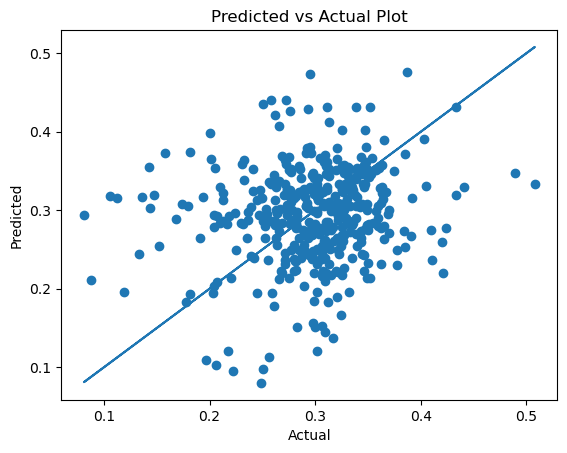

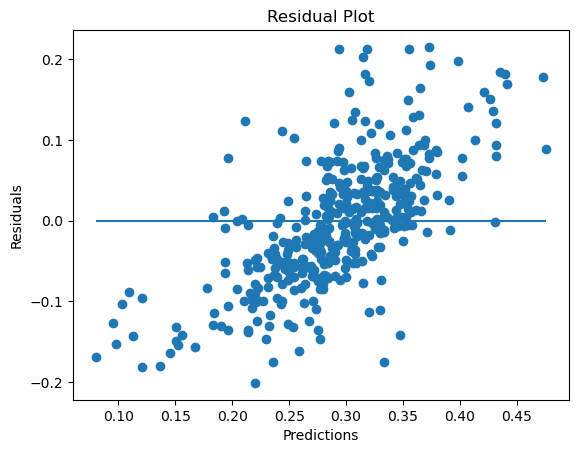

In [31]:
# Attempt 3 Decision Tree
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Do Machine Learning
doRegression(dt, X_train, X_test, y_train, y_test)

### Overfit by a lot, but still the best model

TRAIN METRICS
    R2: 0.8680681479473932
    MSE: 0.0004616437581833067
    RMSE: 0.02148589672746536
    MAE: 0.015972610474631766
    
TEST METRICS
    R2: 0.07020497324850161
    MSE: 0.003050292583578431
    RMSE: 0.05522945394966739
    MAE: 0.041148700980392146
    


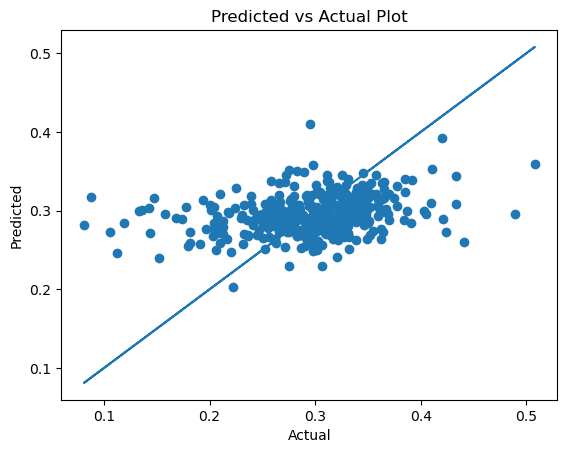

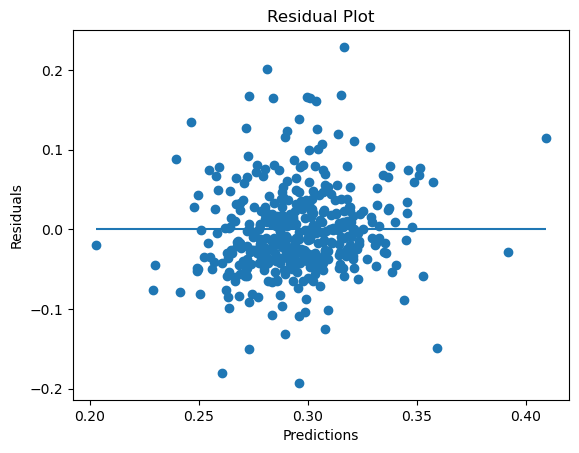

In [32]:
# Attempt 4: Random Forest
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)

### Simalar to Lin Regression

TRAIN METRICS
    R2: 0.15929672011982177
    MSE: 0.002941711312338461
    RMSE: 0.05423754522780747
    MAE: 0.04245998961574458
    
TEST METRICS
    R2: 0.026169183179686084
    MSE: 0.0031947567288946486
    RMSE: 0.05652217908834238
    MAE: 0.04287429561374041
    


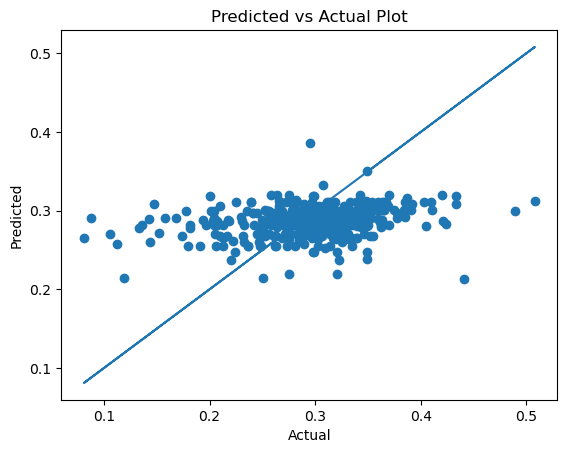

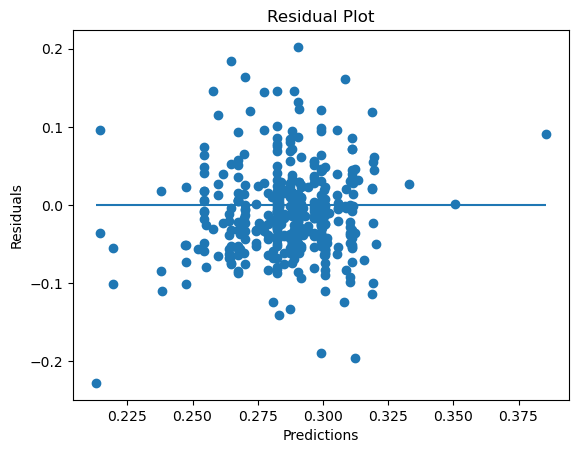

In [33]:
# Attempt 4: AdaBoost
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(random_state=42))
])

# Do Machine Learning
doRegression(ada, X_train, X_test, y_train, y_test)

### Similar to Lin Regression

TRAIN METRICS
    R2: 0.4046884163632085
    MSE: 0.002083059340746321
    RMSE: 0.04564054492166281
    MAE: 0.034453106328742385
    
TEST METRICS
    R2: 0.06303350690023979
    MSE: 0.0030738193502163553
    RMSE: 0.05544203594941617
    MAE: 0.04110530506281947
    


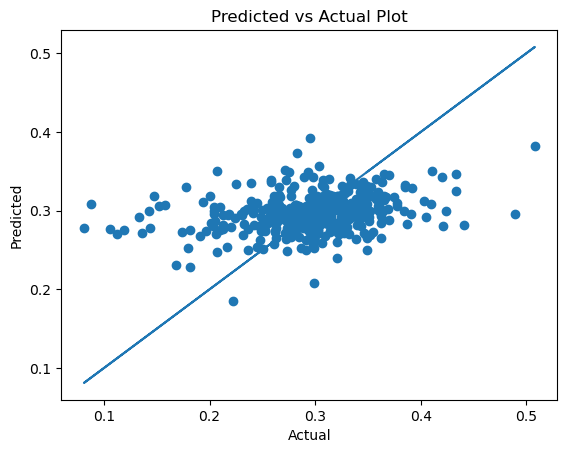

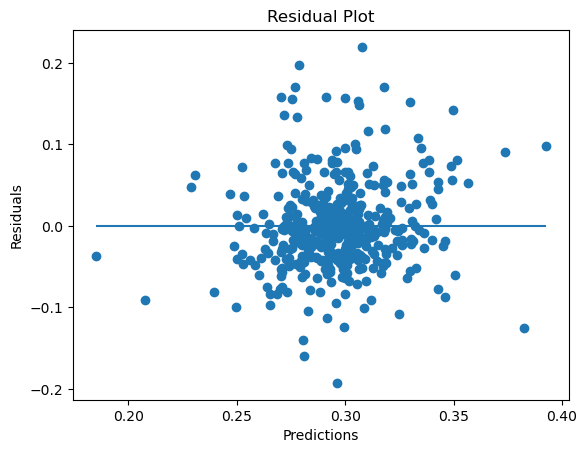

In [34]:
# Attempt 5 GradiantBoost
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Do Machine Learning
doRegression(gb, X_train, X_test, y_train, y_test)

### See Above

# Breaking out the big guns

In [37]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

TRAIN METRICS
    R2: 0.9843793930232895
    MSE: 5.465818600770966e-05
    RMSE: 0.007393117475578868
    MAE: 0.005069712494160071
    
TEST METRICS
    R2: -0.08078636247293236
    MSE: 0.003545635899346439
    RMSE: 0.05954524245770135
    MAE: 0.04522252616227841
    


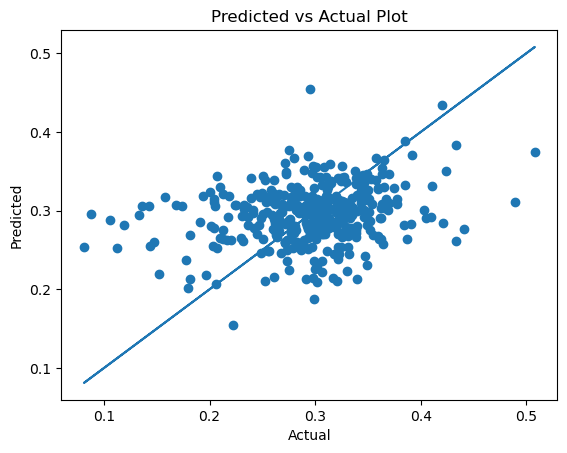

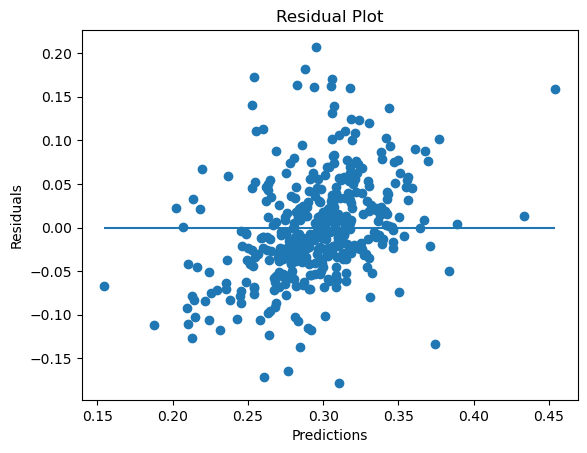

In [38]:
# Attempt 6 XGBRegressor
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Do Machine Learning
doRegression(xgb, X_train, X_test, y_train, y_test)

### Still kinda sucks

TRAIN METRICS
    R2: 0.7937719859676552
    MSE: 0.0007216140299660882
    RMSE: 0.026862874566324583
    MAE: 0.02010678165134153
    
TEST METRICS
    R2: 0.022232445987627414
    MSE: 0.0032076716186444764
    RMSE: 0.056636310072642235
    MAE: 0.04227610801621297
    


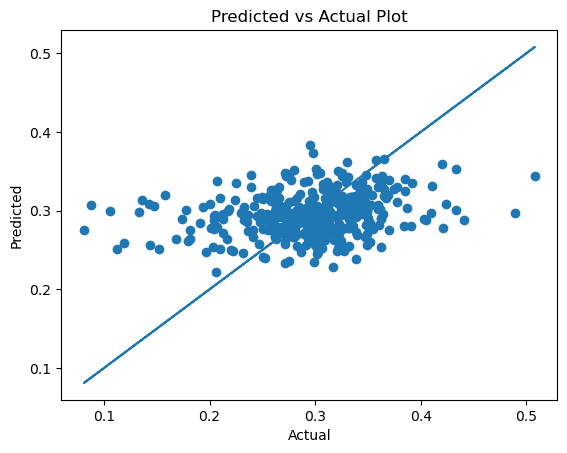

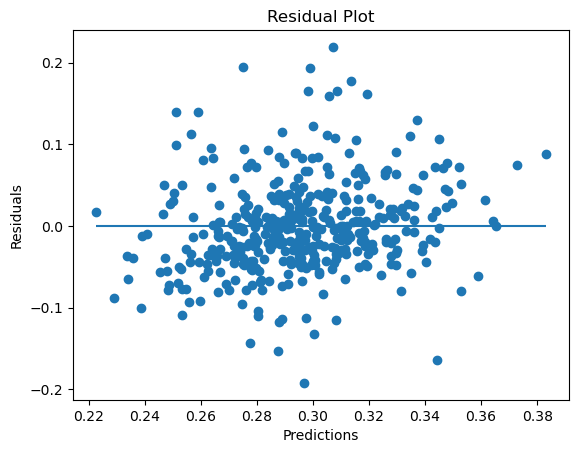

In [39]:
# Attempt 7
lgb  = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42, verbose=-1))
])

# Do Machine Learning
doRegression(lgb , X_train, X_test, y_train, y_test)

### Ditto 

# Model Selection

In [42]:
# Make a new dataframe to analyze feature importance
fi = pd.DataFrame(list(zip(X.columns, dt.named_steps['regressor'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
4,attack_direction,0.190197
1,avg_swing_speed,0.175819
6,sprint_speed,0.170837
5,vertical_swing_path,0.130032
3,attack_angle,0.121337
0,player_age,0.109523
2,avg_swing_length,0.102255


## After testing the dataset on several different models it is clear that Decision Tree was the best model. It is the only model that didn't flatten the data and it seems to have given nearly equal importance to each feature

In [48]:
# RETRAIN ON THE ENTIRE DATASET

# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))  
])

# Do Machine Learning
rf.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['player_age',
                                                   'avg_swing_speed',
                                                   'avg_swing_length',
                                                   'attack_angle',
                                                   'attack_direction',
                                                   'vertical_swing_path',
                                                   'sprint_speed'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [49]:
import pickle

with open("woba_predictor.pkl", "wb") as f:
    pickle.dump(rf, f)

In [62]:
# random data
sample = df2.sample(1)
sample = sample.drop(columns="woba")
sample.head()

,player_age,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed
717,33,70.7,6.8,9.4,2.7,32.3,27.2


In [60]:
with open("woba_predictor.pkl", "rb") as f:
    my_model = pickle.load(f)

my_model.predict(sample)

array([0.271])

In [63]:
df.iloc[717,:]

last_name, first_name    Lewis, Royce
player_id                      668904
year                             2025
player_age                         26
pa                                 70
k_percent                        14.3
bb_percent                        7.1
batting_avg                     0.138
slg_percent                     0.215
on_base_percent                   0.2
on_base_plus_slg                0.415
woba                            0.192
avg_swing_speed                  73.4
avg_swing_length                  7.9
attack_angle                     10.3
attack_direction                 -2.8
vertical_swing_path              29.1
exit_velocity_avg                89.9
barrel_batted_rate                9.1
hard_hit_percent                 41.8
avg_best_speed             100.109671
iz_contact_percent               82.9
swing_percent                    47.3
pull_percent                     23.6
straightaway_percent             47.3
opposite_percent                 29.1
sprint_speed